#### Importar as bibliotecas

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import skew, kurtosis

#### Dataframe (criando as variáveis e visualizando os dados)

In [47]:
# Criando o dataframe com os dados do exercicio
data = {
    'Amostra': list(range(1, 21)),
    'Profundidade': [120, 250, 340, 180, 410, 90, 220, 310, 150, 370, 200, 330, 140, 280, 390, 100, 260, 300, 160, 350],
    'Sílica': [58.2, 60.1, 62.5, 55.3, 63.0, 52.0, 59.0, 61.2, 54.8, 62.8, 56.5, 61.5, 53.5, 60.0, 63.2, 54.0, 58.9, 60.8, 55.0, 62.0],
    'Densidade': [2.68, 2.75, 2.80, 2.65, 2.82, 2.60, 2.70, 2.78, 2.63, 2.81, 2.67, 2.79, 2.62, 2.74, 2.83, 2.64, 2.72, 2.76, 2.66, 2.80],
    'Resistência': [85.3, 91.6, 95.2, 80.1, 97.5, 76.0, 88.4, 93.3, 78.9, 96.0, 82.5, 94.0, 77.2, 90.1, 98.4, 79.3, 87.6, 92.2, 81.0, 95.0]
}

df = pd.DataFrame(data)

print(df.to_string())  # Mostra todas as linhas e colunas

    Amostra  Profundidade  Sílica  Densidade  Resistência
0         1           120    58.2       2.68         85.3
1         2           250    60.1       2.75         91.6
2         3           340    62.5       2.80         95.2
3         4           180    55.3       2.65         80.1
4         5           410    63.0       2.82         97.5
5         6            90    52.0       2.60         76.0
6         7           220    59.0       2.70         88.4
7         8           310    61.2       2.78         93.3
8         9           150    54.8       2.63         78.9
9        10           370    62.8       2.81         96.0
10       11           200    56.5       2.67         82.5
11       12           330    61.5       2.79         94.0
12       13           140    53.5       2.62         77.2
13       14           280    60.0       2.74         90.1
14       15           390    63.2       2.83         98.4
15       16           100    54.0       2.64         79.3
16       17   

#### Medidas de posição (média, mediana e moda)

In [48]:
from scipy.stats import mode

# Lista das variáveis da lista
variaveis = ['Profundidade', 'Sílica', 'Densidade', 'Resistência']

print("\n--- Medidas de Posição: Média, Moda e Mediana ---")

for var in variaveis:
    media = df[var].mean()
    mediana = df[var].median()
    # Calculando a moda (a scipy.stats.mode retorna um array, então usa-se [0] pra pegar o valor)
    moda_resultado = mode(df[var], keepdims=True)
    moda = moda_resultado.mode[0]
    
    print(f"\n{var}:")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda:.2f}")



--- Medidas de Posição: Média, Moda e Mediana ---

Profundidade:
Média: 247.50
Mediana: 255.00
Moda: 90.00

Sílica:
Média: 58.71
Mediana: 59.50
Moda: 52.00

Densidade:
Média: 2.72
Mediana: 2.73
Moda: 2.80

Resistência:
Média: 87.98
Mediana: 89.25
Moda: 76.00


#### Assimetria e Curtose

In [49]:
print("\n--- Assimetria e Curtose ---")
for coluna in ['Profundidade', 'Sílica', 'Densidade', 'Resistência']:
    assimetria = skew(df[coluna])
    curtose = kurtosis(df[coluna])
    print(f"{coluna}: Assimetria = {assimetria:.4f}, Curtose = {curtose:.4f}")


--- Assimetria e Curtose ---
Profundidade: Assimetria = -0.0305, Curtose = -1.2828
Sílica: Assimetria = -0.3950, Curtose = -1.1947
Densidade: Assimetria = -0.1008, Curtose = -1.4066
Resistência: Assimetria = -0.2236, Curtose = -1.3873


#### Representação gráfica (histrograma, boxplot e gráfico de dispersão)

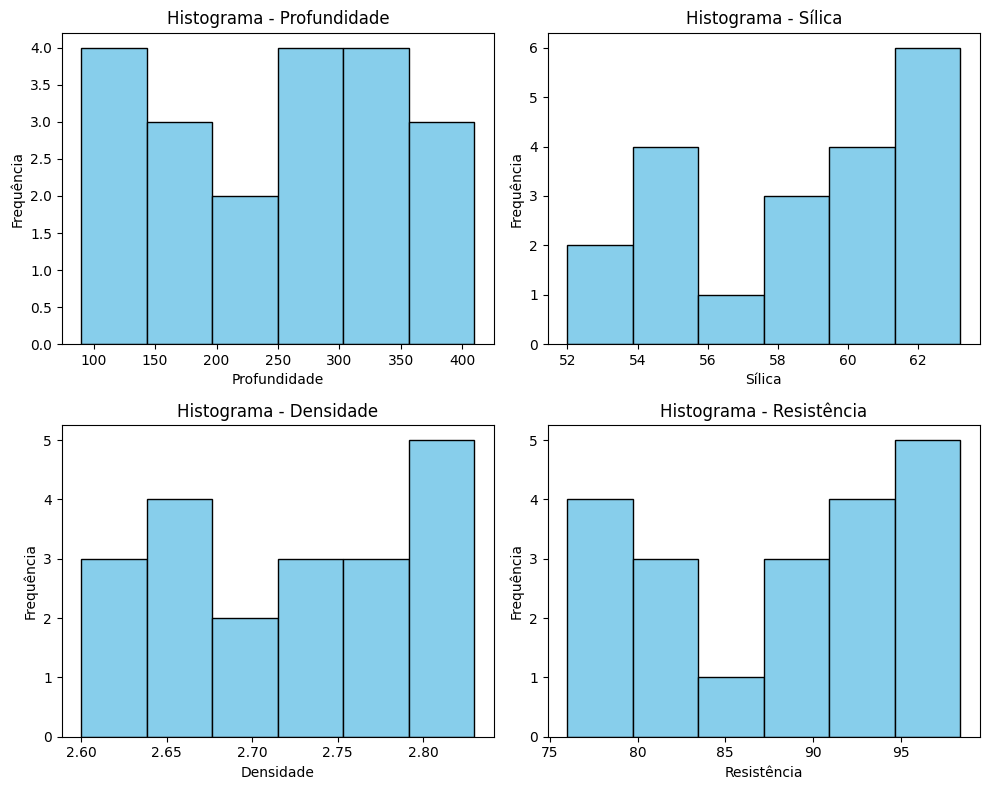

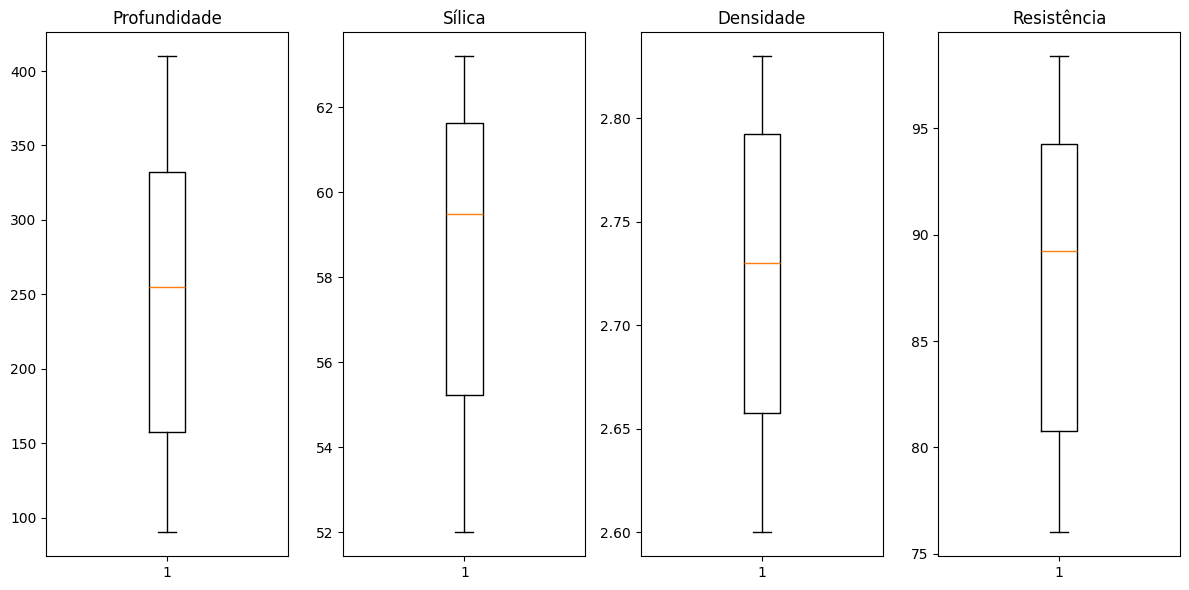

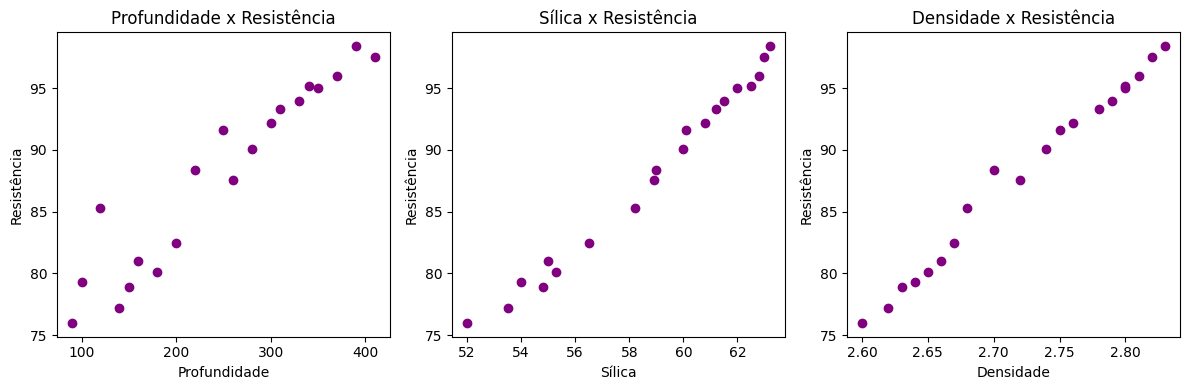

In [50]:
# Histogramas (distribuição das variáveis)
plt.figure(figsize=(10, 8))
variaveis = ['Profundidade', 'Sílica', 'Densidade', 'Resistência']
for i, var in enumerate(variaveis):
    plt.subplot(2, 2, i+1)
    plt.hist(df[var], bins=6, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplots (dispersão e outliers)
plt.figure(figsize=(12, 6))
for i, var in enumerate(variaveis):
    plt.subplot(1, 4, i+1)
    plt.boxplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

# Gráficos de Dispersão (cada variável x Resistência)
plt.figure(figsize=(12, 4))
for i, var in enumerate(variaveis[:-1]):  # Não incluir resistência como X
    plt.subplot(1, 3, i+1)
    plt.scatter(df[var], df['Resistência'], color='purple')
    plt.xlabel(var)
    plt.ylabel('Resistência')
    plt.title(f'{var} x Resistência')
plt.tight_layout()
plt.show()

#### Matriz da correlação


--- Matriz de Correlação ---
              Profundidade    Sílica  Densidade  Resistência
Profundidade      1.000000  0.942736   0.967945     0.951146
Sílica            0.942736  1.000000   0.983788     0.993115
Densidade         0.967945  0.983788   1.000000     0.993179
Resistência       0.951146  0.993115   0.993179     1.000000


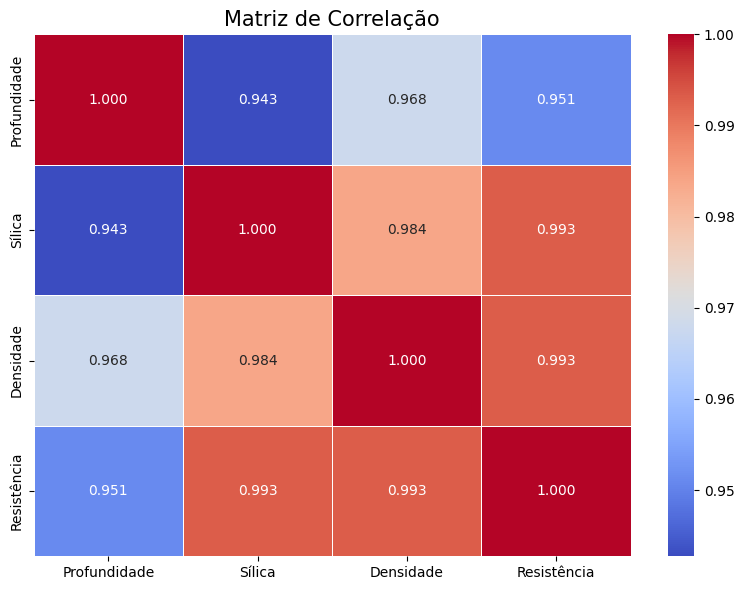

In [51]:
# Removendo a coluna 'Amostra' antes de calcular a correlação
df_para_analise = df.drop('Amostra', axis=1)

# Calculando a matriz de correlação
matriz_correlacao_corrigida = df_para_analise.corr()

# Exibindo a matriz no console
print("\n--- Matriz de Correlação ---")
print(matriz_correlacao_corrigida)

# Gráfico heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao_corrigida, 
            annot=True,          # Mostrar os valores numéricos
            cmap='coolwarm',     # Mesma paleta de cores da imagem
            fmt=".3f",           # Três casas decimais
            linewidths=0.5)      # Espaço entre os quadrados
plt.title('Matriz de Correlação', fontsize=15)
plt.tight_layout()
plt.show()

#### Regressão Linear


--- Regressão Linear Simples para cada variável ---

Variável: Profundidade
Equação da reta: Resistência = 0.0692 * Profundidade + 70.8461
R²: 0.9047


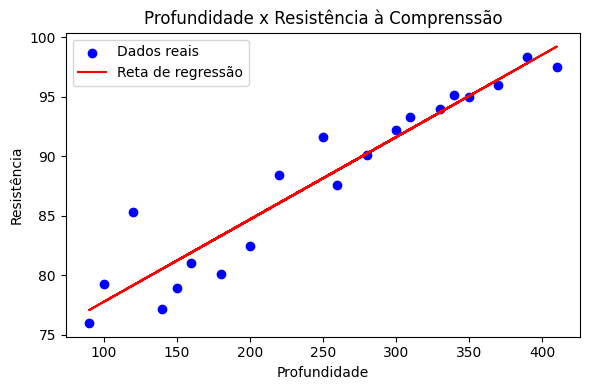


Variável: Sílica
Equação da reta: Resistência = 2.0465 * Sílica + -32.1822
R²: 0.9863


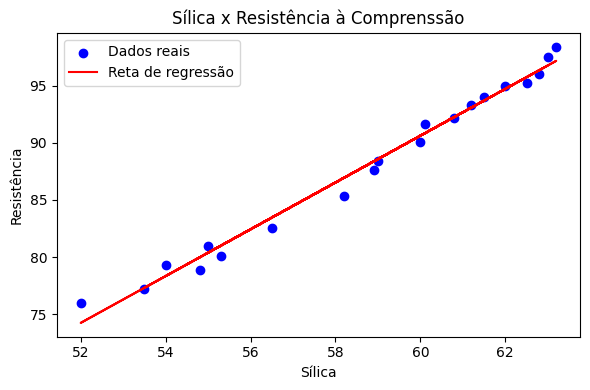


Variável: Densidade
Equação da reta: Resistência = 97.8573 * Densidade + -178.4365
R²: 0.9864


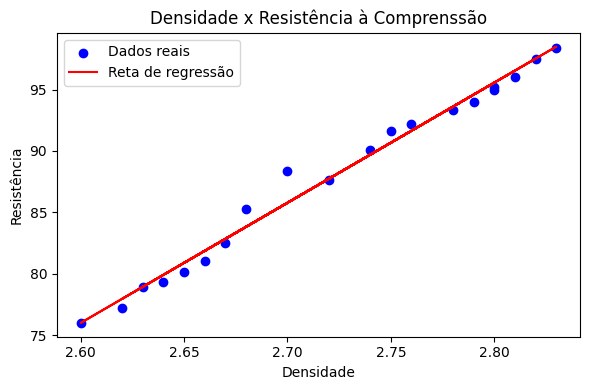


Variável: Resistência
Equação da reta: Resistência = 1.0000 * Resistência + 0.0000
R²: 1.0000


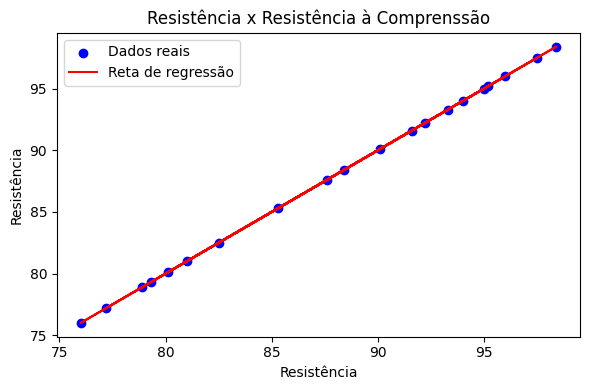

In [52]:
# Variáveis independentes (explicativas)
variaveis_explicativas = ['Profundidade', 'Sílica', 'Densidade', 'Resistência']

# Variável dependente
y = df['Resistência']

print("\n--- Regressão Linear Simples para cada variável ---")

for var in variaveis_explicativas:
    X = df[[var]]  # Transformando em matriz 2D (requisito do sklearn)
    
    # Criando o modelo
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Parâmetros para a regressão
    a = modelo.coef_[0]
    b = modelo.intercept_
    r2 = modelo.score(X, y)
    
    # Exibindo os resultados
    print(f"\nVariável: {var}")
    print(f"Equação da reta: Resistência = {a:.4f} * {var} + {b:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Plotando o gráfico da regressão
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X, modelo.predict(X), color='red', label='Reta de regressão')
    plt.xlabel(var)
    plt.ylabel('Resistência')
    plt.title(f'{var} x Resistência à Comprenssão')
    plt.legend()
    plt.tight_layout()
    plt.show()
